## DS pandas 2

### Reshaping data

In [61]:
import pandas as pd
import numpy as np

In [69]:
s = pd.Series([3, -5, 7, 4], index=['a', 'b', 'c', 'd'])

In [45]:
data = {'Country': ['Belgium', 'India', 'Brazil'], 
        'Capital': ['Brussels', 'New Delhi', 'Brasília'], 
        'Population': [11190846, 1303171035, 207847528]}

df = pd.DataFrame(data, columns=['Country', 'Capital', 'Population'])
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [128]:
df2=pd.DataFrame({'Date': ['2016-03-01', '2016-03-02', '2016-03-01', '2016-03-03', '2016-03-02', '2016-03-03'], 
                 'Type': ['a', 'b', 'c', 'a', 'a', 'c'], 'Value' : [11.432, 13.031, 20.784, 99.906, 1.303, 20.784]})

In [129]:
df2

,Date,Type,Value
0,2016-03-01,a,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,a,99.906
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [11]:
# pivot, spead rows into columns
df3=df2.pivot(index='Date', columns='Type', values='Value')
df3

Type,a,b,c
Date,,,
2016-03-01,11.432,NaN,20.784
2016-03-02,1.303,13.031,NaN
2016-03-03,99.906,NaN,20.784


In [78]:
# pivot table
df4=pd.pivot_table(df2, values='Value', index='Date', columns='Type')
df4

Type,a,b,c
Date,,,
2016-03-01,11.432,NaN,20.784
2016-03-02,1.303,13.031,NaN
2016-03-03,99.906,NaN,20.784


In [14]:
# Stack/unstack
stacked=df3.stack() # pivot a level of column labels
stacked

Date        Type
2016-03-01  a       11.432
            c       20.784
2016-03-02  a        1.303
            b       13.031
2016-03-03  a       99.906
            c       20.784
dtype: float64

In [15]:
stacked.unstack() # pivot a level of index labels

Type,a,b,c
Date,,,
2016-03-01,11.432,NaN,20.784
2016-03-02,1.303,13.031,NaN
2016-03-03,99.906,NaN,20.784


In [16]:
# Melt /gather columns into rows
pd.melt(df2, id_vars=['Date'], value_vars=['Type', 'Value'], value_name='Observations')

,Date,variable,Observations
0,2016-03-01,Type,a
1,2016-03-02,Type,b
2,2016-03-01,Type,c
3,2016-03-03,Type,a
4,2016-03-02,Type,a
5,2016-03-03,Type,c
6,2016-03-01,Value,11.432
7,2016-03-02,Value,13.031
8,2016-03-01,Value,20.784
9,2016-03-03,Value,99.906


### Iteration

In [18]:

df2.iteritems()

<generator object DataFrame.iteritems at 0x00000182A2C63AF0>

In [19]:
df2.iterrows()

<generator object DataFrame.iterrows at 0x00000182A2C63150>

### Indexing

In [24]:
# selecting
df3.loc[:, (df3>1).any()] # select columns with any values > 1

Type,a,b,c
Date,,,
2016-03-01,11.432,NaN,20.784
2016-03-02,1.303,13.031,NaN
2016-03-03,99.906,NaN,20.784


In [25]:
df3.loc[:, (df3>1).all()] # select columns with values > 1

Type,a
Date,
2016-03-01,11.432
2016-03-02,1.303
2016-03-03,99.906


In [26]:
df3.loc[:, df3.isnull().any()] # select columns with NaN

Type,b,c
Date,,
2016-03-01,NaN,20.784
2016-03-02,13.031,NaN
2016-03-03,NaN,20.784


In [27]:
df3.loc[:, df3.notnull().all()] # select columns without NaN

Type,a
Date,
2016-03-01,11.432
2016-03-02,1.303
2016-03-03,99.906


In [29]:
# indexing with 'isin'
df[(df.Country.isin(df2.Type))] # find same elements

,Country,Capital,Population


In [31]:
df3.filter(items=['a', 'b']) # pay attention to the 'bracket' / filter on values

Type,a,b
Date,,
2016-03-01,11.432,NaN
2016-03-02,1.303,13.031
2016-03-03,99.906,NaN


In [32]:
df.select(lambda x: not x%5) # specify conditions

C:\Users\K Li\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'select' is deprecated and will be removed in a future release. You can use .loc[labels.map(crit)] as a replacement
  """Entry point for launching an IPython kernel.


,Country,Capital,Population
0,Belgium,Brussels,11190846


In [34]:
# where
s.where(s>0)

a    3.0
b    NaN
c    7.0
d    4.0
dtype: float64

In [ ]:
# Query
# df6.query('second' > 'first')

### Setting index

In [35]:
df.set_index('Country')

,Capital,Population
Country,,
Belgium,Brussels,11190846
India,New Delhi,1303171035
Brazil,Brasília,207847528


In [37]:
df4=df.reset_index()
df4

,index,Country,Capital,Population
0,0,Belgium,Brussels,11190846
1,1,India,New Delhi,1303171035
2,2,Brazil,Brasília,207847528


In [38]:
df=df.rename(index=str, columns={'Country': 'cntry', 'Capital': 'cptl', 'Population': 'ppltn'})

In [39]:
df

,cntry,cptl,ppltn
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [41]:
# reindexing
s2=s.reindex(['a', 'c', 'd', 'e', 'b']) # order changed
s2

a    3.0
c    7.0
d    4.0
e    NaN
b   -5.0
dtype: float64

In [46]:
# forward filling
df.reindex(range(4), method='ffill') # rerun the df from beginning

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528
3,Brazil,Brasília,207847528


In [47]:
df

,Country,Capital,Population
0,Belgium,Brussels,11190846
1,India,New Delhi,1303171035
2,Brazil,Brasília,207847528


In [56]:
# backward filling
df=df.reindex(range(5), method='bfill') # need to check again
# s3=s.reindex(range(5), method='bfill') # not working...

In [57]:
df

,Country,Capital,Population
0,Belgium,Brussels,1.119085e+07
1,India,New Delhi,1.303171e+09
2,Brazil,Brasília,2.078475e+08
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [62]:
# multiindexing
arrays=[np.array([1,2,3]), np.array([5,4,3])]

df5=pd.DataFrame(np.random.rand(3, 2), index=arrays)
df5

,,0,1
1,5,0.707832,0.276241
2,4,0.840263,0.600291
3,3,0.238513,0.268869


In [64]:
tuples=list(zip(*arrays))
index=pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [65]:
df6=pd.DataFrame(np.random.rand(3, 2), index=index)
df6

,,0,1
first,second,,
1,5,0.848183,0.559548
2,4,0.605175,0.837006
3,3,0.006458,0.717965


In [66]:
df2.set_index(['Date', 'Type']) # pay attention to how it looks like

,,Value
Date,Type,
2016-03-01,a,11.432
2016-03-02,b,13.031
2016-03-01,c,20.784
2016-03-03,a,99.906
2016-03-02,a,1.303
2016-03-03,c,20.784


In [67]:
# Duplicate data
s.unique()

array([ 3, -5,  7,  4], dtype=int64)

In [71]:
df2.duplicated('Type')

0    False
1    False
2    False
3     True
4     True
5     True
dtype: bool

In [72]:
df2.drop_duplicates('Type', keep='last')

,Date,Type,Value
1,2016-03-02,b,13.031
4,2016-03-02,a,1.303
5,2016-03-03,c,20.784


In [73]:
df.index.duplicated()

array([False, False, False, False, False])

### Grouping data

In [74]:
# aggregation
df2.groupby(by=['Date', 'Type']).mean()

Value
Date       Type        
2016-03-01 a     11.432
           c     20.784
2016-03-02 a      1.303
           b     13.031
2016-03-03 a     99.906
           c     20.784

In [75]:
df4.groupby(level=0).sum()

,index,Population
0,0,11190846
1,1,1303171035
2,2,207847528


In [79]:
df4.groupby(level=0).agg({'a': lambda x:sum(x)/len(x)}) # 'b' : np.sum , not working maybe due to NaN

,a
Date,
2016-03-01,11.432
2016-03-02,1.303
2016-03-03,99.906


In [80]:
# Transformation
customSum= lambda x: (x+x%2)
df4.groupby(level=0).transform(customSum)

Type,a,b,c
Date,,,
2016-03-01,12.864,NaN,21.568
2016-03-02,2.606,14.062,NaN
2016-03-03,101.812,NaN,21.568


In [81]:
1.303%2

1.303

In [82]:
11.432%2

1.4320000000000004

In [83]:
# Missing data
df.dropna()

,Country,Capital,Population
0,Belgium,Brussels,1.119085e+07
1,India,New Delhi,1.303171e+09
2,Brazil,Brasília,2.078475e+08


In [84]:
df3.fillna(df3.mean())

Type,a,b,c
Date,,,
2016-03-01,11.432,13.031,20.784
2016-03-02,1.303,13.031,20.784
2016-03-03,99.906,13.031,20.784


In [85]:
df2.replace('a', 'f')

,Date,Type,Value
0,2016-03-01,f,11.432
1,2016-03-02,b,13.031
2,2016-03-01,c,20.784
3,2016-03-03,f,99.906
4,2016-03-02,f,1.303
5,2016-03-03,c,20.784


### Combining data

In [95]:
data1=pd.DataFrame({'X1' : ['a', 'b', 'c'], 'X2' : [11.432, 1.303, 99.906]})

In [98]:
data2=pd.DataFrame({'X1' : ['a', 'b', 'd'], 'X3' : [20.784, 'NaN', 20.784]})

In [99]:
# Merge
pd.merge(data1, data2, how='left', on='X1')

,X1,X2,X3
0,a,11.432,20.784
1,b,1.303,NaN
2,c,99.906,NaN


In [100]:
pd.merge(data1, data2, how='right', on='X1')

,X1,X2,X3
0,a,11.432,20.784
1,b,1.303,NaN
2,d,NaN,20.784


In [102]:
pd.merge(data1, data2, how='inner', on='X1')

,X1,X2,X3
0,a,11.432,20.784
1,b,1.303,NaN


In [103]:
pd.merge(data1, data2, how='outer', on='X1')

,X1,X2,X3
0,a,11.432,20.784
1,b,1.303,NaN
2,c,99.906,NaN
3,d,NaN,20.784


In [ ]:
# join
# data1.join(data2, how='right') # not working...

In [105]:
# Concatenate
s.append(s2) # vertical

a    3.0
b   -5.0
c    7.0
d    4.0
a    3.0
c    7.0
d    4.0
e    NaN
b   -5.0
dtype: float64

In [106]:
pd.concat([s, s2], axis=1, keys=['One', 'Two']) # horizontal

,One,Two
a,3.0,3.0
b,-5.0,-5.0
c,7.0,7.0
d,4.0,4.0
e,NaN,NaN


In [107]:
pd.concat([data1, data2], axis=1, join='inner')

,X1,X2,X1,X3
0,a,11.432,a,20.784
1,b,1.303,b,NaN
2,c,99.906,d,20.784


### Dates

In [109]:
df2['Date']=pd.to_datetime(df2['Date'])

In [110]:
df2['Date']=pd.date_range('2000-1-1', periods=6, freq='M')

In [114]:
from datetime import datetime

In [116]:
dates=[datetime(2012, 5, 1), datetime(2012, 5, 2)]
dates

[datetime.datetime(2012, 5, 1, 0, 0), datetime.datetime(2012, 5, 2, 0, 0)]

In [117]:
index=pd.DatetimeIndex(dates)

In [121]:
index=pd.date_range(datetime(2012, 2, 1), periods=6, freq='BM') # what's the difference between 'M' and 'BM' ?

In [123]:
index

DatetimeIndex(['2012-02-29', '2012-03-31', '2012-04-30', '2012-05-31',
               '2012-06-30', '2012-07-31'],
              dtype='datetime64[ns]', freq='M')

### Visualization

In [124]:
import matplotlib.pyplot as plt

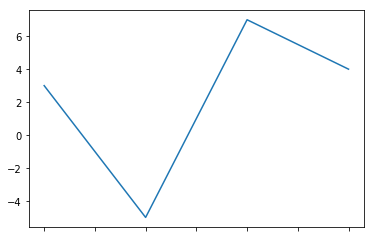

In [126]:
s.plot()
plt.show()

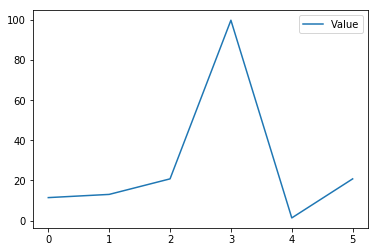

In [130]:
df2.plot()
plt.show()